In [8]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split

X = np.random.random((20000, 2)) * 2 - 1
y = ((np.sin(X[:, 1] * np.pi * X[:,1] * 6) + np.cos(X[:, 0] * np.pi * X[:, 0] * 4)) > 0).astype(int)

# randomly split the data into training, cross validation and test sets
random_state = 42

X_train, X_blind, y_train, y_blind = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

X_test, X_cv, y_test, y_cv = train_test_split(
    X_blind, y_blind, test_size=0.5, random_state=random_state)

print(f'tf.__version__={tf.__version__}')
print(f'X.shape={X.shape}')
print(f'y.shape={y.shape}')
print(f'y max={np.max(y)} y min={np.min(y)}')

tf.__version__=2.16.1
X.shape=(20000, 2)
y.shape=(20000,)
y max=1 y min=0


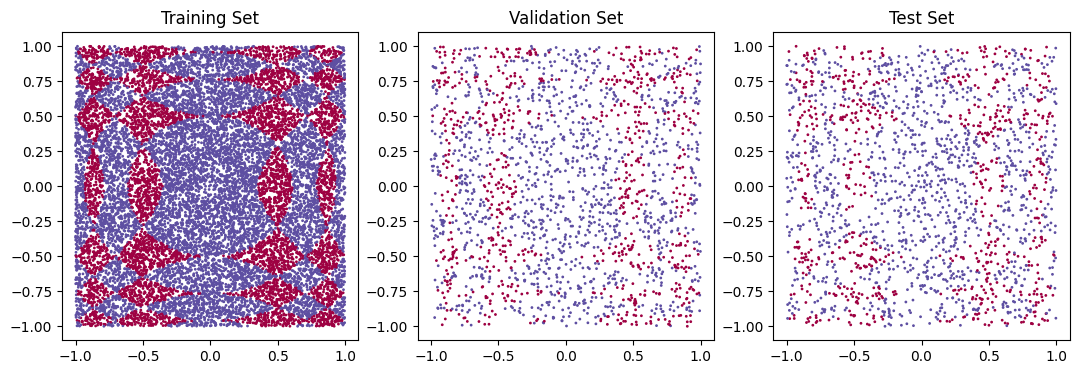

In [9]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap=plt.cm.Spectral)
plt.title('Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_cv[:, 0], X_cv[:, 1], c=y_cv, s=1, cmap=plt.cm.Spectral)
plt.title('Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=1, cmap=plt.cm.Spectral)
plt.title('Test Set')

plt.show()


In [10]:
# setup the layers
regfac = 0.00005
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_regularizer=l1(regfac))
])

epochs = 300
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [11]:
%%time
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_data=(X_cv, y_cv))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/300


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6144 - loss: 0.7514

I0000 00:00:1714360265.483318   18565 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_62', 4 bytes spill stores, 4 bytes spill loads



500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6144 - loss: 0.7512 - val_accuracy: 0.6700 - val_loss: 0.6069
Epoch 2/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6823 - loss: 0.5883 - val_accuracy: 0.6970 - val_loss: 0.5691
Epoch 3/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7030 - loss: 0.5637 - val_accuracy: 0.7050 - val_loss: 0.5718
Epoch 4/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7144 - loss: 0.5506 - val_accuracy: 0.7250 - val_loss: 0.5436
Epoch 5/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7188 - loss: 0.5416 - val_accuracy: 0.7265 - val_loss: 0.5354
Epoch 6/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7288 - loss: 0.5329 - val_accuracy: 0.7380 - val_loss: 0.5216
Epoch 7/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7310 - loss: 0.5222 - val_accuracy: 0.7420 - val_loss: 0.5100
Epoch 8/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7505 - loss: 0.5052 - val_accuracy: 0.75

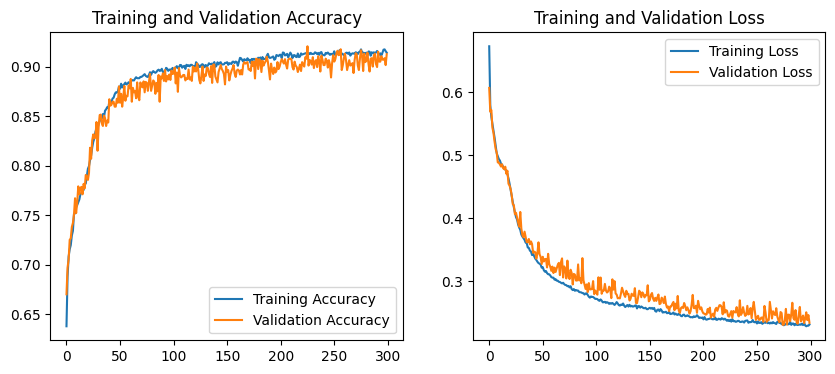

test acc: 91.60% test loss: 0.233


In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print(f'test acc: {test_acc*100:0.2f}% test loss: {test_loss:0.3f}')

In [13]:
V1 = np.linspace(-1, 1, 150)
V2 = np.linspace(-1, 1, 150)
V1, V2 = np.meshgrid(V1, V2)
XT = np.c_[V1.ravel(), V2.ravel()]
Z = model.predict(XT)
YT = np.argmax(Z, axis=1)


704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


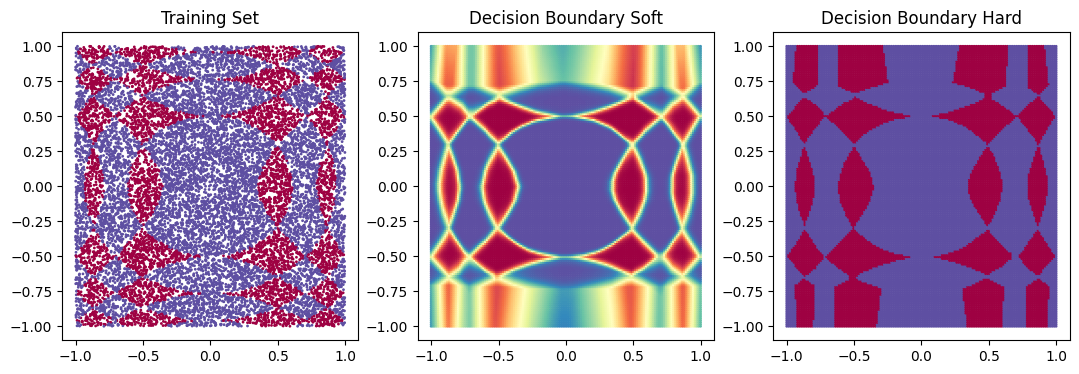

In [14]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap=plt.cm.Spectral)
plt.title('Training Set')

plt.subplot(1, 3, 2)
plt.scatter(XT[:, 0], XT[:, 1], c=Z[:, 1], s=1, cmap=plt.cm.Spectral)
plt.title('Decision Boundary Soft')

plt.subplot(1, 3, 3)
plt.scatter(XT[:, 0], XT[:, 1], c=YT, s=1, cmap=plt.cm.Spectral)
plt.title('Decision Boundary Hard')

plt.show()